<a href="https://colab.research.google.com/github/leoo-tech/alura-store-br/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
# 1. Converter os DataFrames para listas (o "Modo Raiz"!)
# Agora podemos usar 'for' e 'if' nativos do Python!
lista_loja1 = loja.to_dict('records')
lista_loja2 = loja2.to_dict('records')
lista_loja3 = loja3.to_dict('records')
lista_loja4 = loja4.to_dict('records')

# 2. Criar nossa primeira função de análise (como o desafio pede!)
def calcular_faturamento(lista_da_loja):
    faturamento = 0
    # Usando o loop FOR para percorrer a LISTA
    for venda in lista_da_loja:
        # Acessando o 'Preço' de cada venda (dicionário)
        faturamento += venda['Preço']
    return faturamento

# 3. Calcular e ver os resultados de cada loja
fat_loja1 = calcular_faturamento(lista_loja1)
fat_loja2 = calcular_faturamento(lista_loja2)
fat_loja3 = calcular_faturamento(lista_loja3)
fat_loja4 = calcular_faturamento(lista_loja4)

print("--- Faturamento Total (R$) ---")
print(f"Loja 1: R$ {fat_loja1:.2f}")
print(f"Loja 2: R$ {fat_loja2:.2f}")
print(f"Loja 3: R$ {fat_loja3:.2f}")
print(f"Loja 4: R$ {fat_loja4:.2f}")


--- Faturamento Total (R$) ---
Loja 1: R$ 1534509.12
Loja 2: R$ 1488459.06
Loja 3: R$ 1464025.03
Loja 4: R$ 1384497.58


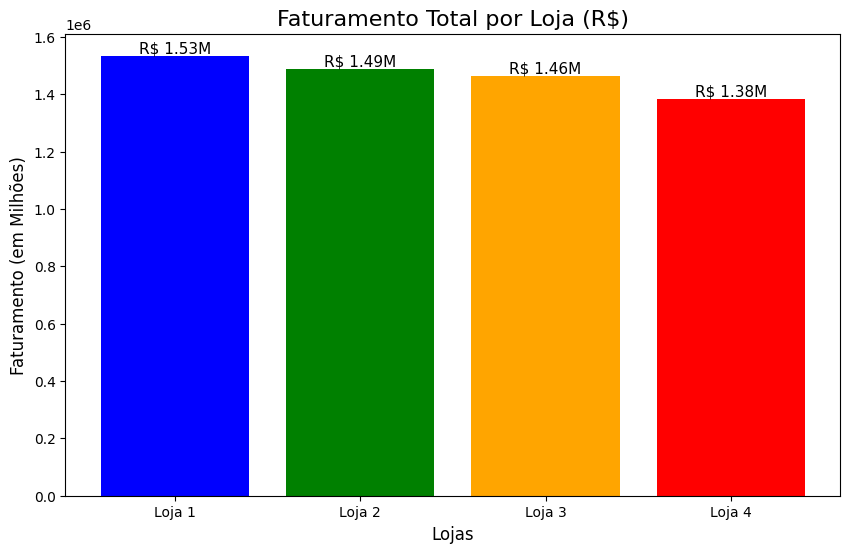

In [8]:
import matplotlib.pyplot as plt

# 1. Preparar os dados que já calculamos
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [fat_loja1, fat_loja2, fat_loja3, fat_loja4]

# 2. Criar o gráfico de barras
plt.figure(figsize=(10, 6)) # Define um tamanho legal para a figura
plt.bar(lojas, faturamentos, color=['blue', 'green', 'orange', 'red'])

# 3. Adicionar títulos e rótulos (ESSENCIAL!)
plt.title('Faturamento Total por Loja (R$)', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (em Milhões)', fontsize=12)

# 4. Colocar os valores exatos em cima das barras (detalhe pro)
# Isso é um loop 'for' para formatar e adicionar o texto
for i in range(len(lojas)):
    plt.text(i, faturamentos[i] + 10000, # Posição (x, y + um espacinho)
             f"R$ {faturamentos[i]/1000000:.2f}M", # Texto formatado
             ha='center', fontsize=11) # Centraliza

# 5. Mostrar o gráfico
plt.show()


# 2. Vendas por Categoria

In [3]:
# 1. Criar nossa função de contagem (reutilizável!)
def contar_categorias(lista_da_loja):
    contagem = {}

    # Usando o loop FOR para percorrer a LISTA
    for venda in lista_da_loja:
        # Pegando a categoria de cada venda
        categoria = venda['Categoria do Produto']

        # Usando IF/ELSE (condicionais!) para contar
        if categoria in contagem:
            contagem[categoria] += 1
        else:
            contagem[categoria] = 1

    return contagem

# 2. Calcular e ver os resultados de cada loja
cont_loja1 = contar_categorias(lista_loja1)
cont_loja2 = contar_categorias(lista_loja2)
cont_loja3 = contar_categorias(lista_loja3)
cont_loja4 = contar_categorias(lista_loja4)

# 3. Imprimir os resultados (ainda não vamos ordenar, só ver os números)
print("--- Contagem de Vendas por Categoria ---")
print("\nLOJA 1:")
print(cont_loja1)

print("\nLOJA 2:")
print(cont_loja2)

print("\nLOJA 3:")
print(cont_loja3)

print("\nLOJA 4:")
print(cont_loja4)


--- Contagem de Vendas por Categoria ---

LOJA 1:
{'eletronicos': 448, 'moveis': 465, 'brinquedos': 324, 'eletrodomesticos': 312, 'utilidades domesticas': 171, 'esporte e lazer': 284, 'livros': 173, 'instrumentos musicais': 182}

LOJA 2:
{'moveis': 442, 'instrumentos musicais': 224, 'esporte e lazer': 275, 'eletronicos': 422, 'utilidades domesticas': 181, 'brinquedos': 313, 'eletrodomesticos': 305, 'livros': 197}

LOJA 3:
{'eletrodomesticos': 278, 'moveis': 499, 'instrumentos musicais': 177, 'esporte e lazer': 277, 'eletronicos': 451, 'brinquedos': 315, 'utilidades domesticas': 177, 'livros': 185}

LOJA 4:
{'eletrodomesticos': 254, 'moveis': 480, 'esporte e lazer': 277, 'livros': 187, 'eletronicos': 451, 'instrumentos musicais': 170, 'brinquedos': 338, 'utilidades domesticas': 201}


In [4]:
# --- ADICIONE ESSE CÓDIGO NA MESMA CÉLULA ---

# 4. Criar uma função "helper" para ordenar nossos dicionários
def ordenar_contagem(dicionario_contagem):
    # .items() -> pega os pares (chave, valor)
    # sorted() -> ordena a lista
    # key=lambda x: x[1] -> diz para ordenar pelo SEGUNDO item (o valor, a contagem)
    # reverse=True -> ordena do MAIOR para o MENOR
    itens_ordenados = sorted(dicionario_contagem.items(), key=lambda x: x[1], reverse=True)
    return itens_ordenados

# 5. Ordenar nossos resultados
ordem_loja1 = ordenar_contagem(cont_loja1)
ordem_loja2 = ordenar_contagem(cont_loja2)
ordem_loja3 = ordenar_contagem(cont_loja3)
ordem_loja4 = ordenar_contagem(cont_loja4)

# 6. Imprimir os resultados ordenados (MUITO melhor de ler!)
print("\n--- Vendas por Categoria (Mais Populares) ---")
print("\nLOJA 1:")
print(ordem_loja1)

print("\nLOJA 2:")
print(ordem_loja2)

print("\nLOJA 3:")
print(ordem_loja3)

print("\nLOJA 4:")
print(ordem_loja4)


--- Vendas por Categoria (Mais Populares) ---

LOJA 1:
[('moveis', 465), ('eletronicos', 448), ('brinquedos', 324), ('eletrodomesticos', 312), ('esporte e lazer', 284), ('instrumentos musicais', 182), ('livros', 173), ('utilidades domesticas', 171)]

LOJA 2:
[('moveis', 442), ('eletronicos', 422), ('brinquedos', 313), ('eletrodomesticos', 305), ('esporte e lazer', 275), ('instrumentos musicais', 224), ('livros', 197), ('utilidades domesticas', 181)]

LOJA 3:
[('moveis', 499), ('eletronicos', 451), ('brinquedos', 315), ('eletrodomesticos', 278), ('esporte e lazer', 277), ('livros', 185), ('instrumentos musicais', 177), ('utilidades domesticas', 177)]

LOJA 4:
[('moveis', 480), ('eletronicos', 451), ('brinquedos', 338), ('esporte e lazer', 277), ('eletrodomesticos', 254), ('utilidades domesticas', 201), ('livros', 187), ('instrumentos musicais', 170)]


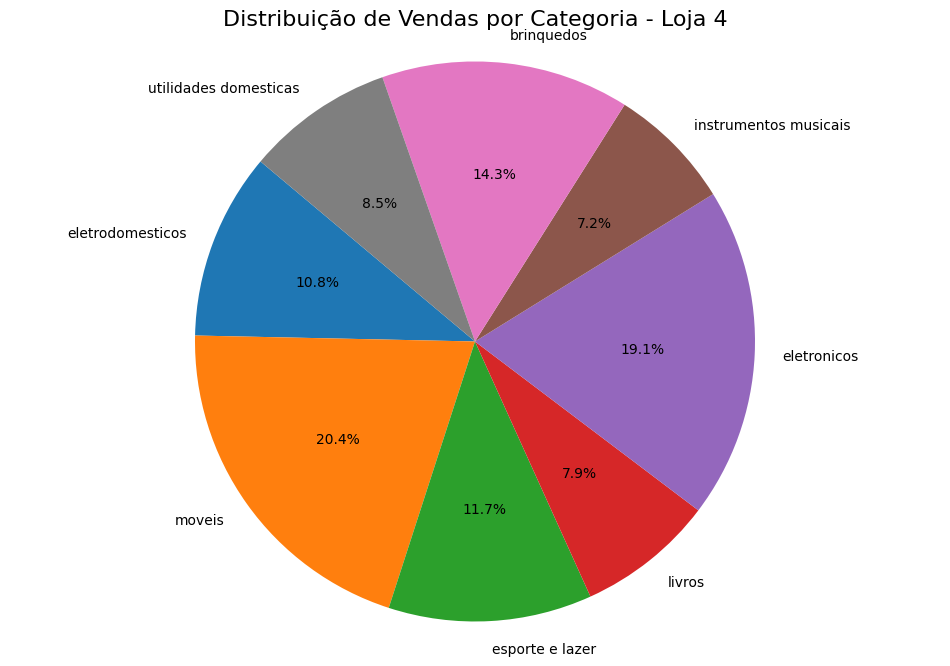

In [16]:
import matplotlib.pyplot as plt

# 1. Pegar os dados da Loja 4 que já calculamos
# (Pode ser o dicionário 'cont_loja4' ou a lista ordenada 'ordem_loja4')
dados_loja4 = cont_loja4 # Usando o dicionário original

# 2. Separar as "fatias" (categorias) e os "tamanhos" (contagens)
categorias = list(dados_loja4.keys())
contagens = list(dados_loja4.values())

# 3. Criar o Gráfico de Pizza
plt.figure(figsize=(12, 8)) # Um tamanho bom pra pizza
# autopct='%1.1f%%' -> coloca a porcentagem em cada fatia
plt.pie(contagens, labels=categorias, autopct='%1.1f%%', startangle=140)

# 4. Adicionar Título
plt.title('Distribuição de Vendas por Categoria - Loja 4', fontsize=16)
plt.axis('equal')  # Garante que a pizza seja um círculo perfeito

# 5. Mostrar o gráfico
plt.show()

# 3. Média de Avaliação das Lojas


In [5]:
# 1. Criar nossa função para calcular a média "na mão"
def calcular_media_avaliacao(lista_da_loja):
    soma_avaliacoes = 0

    # Usando o loop FOR para somar todas as avaliações
    for venda in lista_da_loja:
        soma_avaliacoes += venda['Avaliação da compra']

    # Calculando o total de vendas
    total_vendas = len(lista_da_loja)

    # Calculando a média (soma / total)
    if total_vendas > 0:
        media = soma_avaliacoes / total_vendas
        return media
    else:
        return 0 # Caso a loja não tenha vendas

# 2. Calcular e ver os resultados de cada loja
media_loja1 = calcular_media_avaliacao(lista_loja1)
media_loja2 = calcular_media_avaliacao(lista_loja2)
media_loja3 = calcular_media_avaliacao(lista_loja3)
media_loja4 = calcular_media_avaliacao(lista_loja4)

# 3. Imprimir os resultados (o :.2f formata para 2 casas decimais)
print("--- Média de Avaliação (1 a 5 estrelas) ---")
print(f"Loja 1: {media_loja1:.2f} estrelas")
print(f"Loja 2: {media_loja2:.2f} estrelas")
print(f"Loja 3: {media_loja3:.2f} estrelas")
print(f"Loja 4: {media_loja4:.2f} estrelas")


--- Média de Avaliação (1 a 5 estrelas) ---
Loja 1: 3.98 estrelas
Loja 2: 4.04 estrelas
Loja 3: 4.05 estrelas
Loja 4: 4.00 estrelas


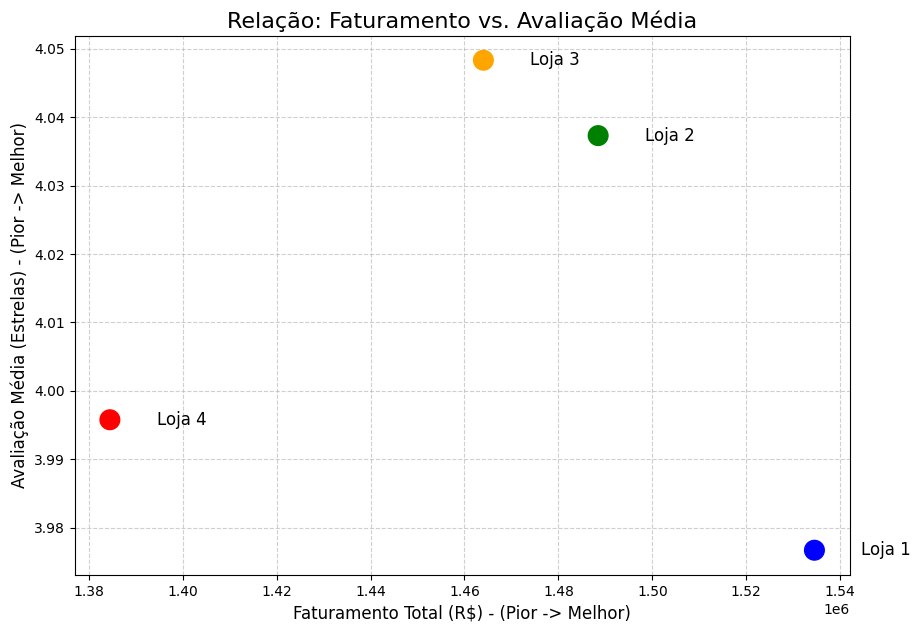

In [17]:
import matplotlib.pyplot as plt

# 1. Preparar os dados que já calculamos
# (Eles já devem estar na memória das células anteriores)
faturamentos = [fat_loja1, fat_loja2, fat_loja3, fat_loja4]
avaliacoes = [media_loja1, media_loja2, media_loja3, media_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['blue', 'green', 'orange', 'red'] # Mantendo o padrão

# 2. Criar o Gráfico de Dispersão (Scatter Plot)
plt.figure(figsize=(10, 7))
# s=200 -> Tamanho dos pontos (para ficarem bem visíveis)
plt.scatter(faturamentos, avaliacoes, s=200, c=cores)

# 3. Adicionar títulos e rótulos
plt.title('Relação: Faturamento vs. Avaliação Média', fontsize=16)
plt.xlabel('Faturamento Total (R$) - (Pior -> Melhor)', fontsize=12)
plt.ylabel('Avaliação Média (Estrelas) - (Pior -> Melhor)', fontsize=12)

# 4. Adicionar os rótulos em cada ponto (ESSENCIAL!)
# Usando 'enumerate' para pegar o índice (i) e o nome da loja
for i, nome in enumerate(lojas):
    # Posição (x + um espacinho, y)
    plt.text(faturamentos[i] + 10000, avaliacoes[i],
             nome, fontsize=12, va='center')

# 5. Adicionar grid para facilitar a leitura dos quadrantes
plt.grid(True, linestyle='--', alpha=0.6)

# 6. Mostrar o gráfico
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [6]:
# 1. Função para contar e já ordenar os produtos
def rankear_produtos(lista_da_loja):
    contagem_produto = {}

    # Loop FOR para contar cada produto
    for venda in lista_da_loja:
        # Acessando a chave 'Produto'
        produto = venda['Produto']

        # Condicional IF/ELSE para adicionar ao dicionário
        if produto in contagem_produto:
            contagem_produto[produto] += 1
        else:
            contagem_produto[produto] = 1

    # Agora, vamos ordenar (key=lambda x: x[1] ordena pelo valor, a contagem)
    itens_ordenados = sorted(contagem_produto.items(), key=lambda x: x[1], reverse=True)
    return itens_ordenados

# 2. Calcular e mostrar os rankings de cada loja
print("--- Ranking de Produtos (Mais e Menos Vendidos) ---")

print("\nLOJA 1:")
rank_loja1 = rankear_produtos(lista_loja1)
print(f"  Mais vendidos: {rank_loja1[:5]}")  # Mostra o Top 5
print(f"  Menos vendidos: {rank_loja1[-5:]}") # Mostra o Bottom 5

print("\nLOJA 2:")
rank_loja2 = rankear_produtos(lista_loja2)
print(f"  Mais vendidos: {rank_loja2[:5]}")
print(f"  Menos vendidos: {rank_loja2[-5:]}")

print("\nLOJA 3:")
rank_loja3 = rankear_produtos(lista_loja3)
print(f"  Mais vendidos: {rank_loja3[:5]}")
print(f"  Menos vendidos: {rank_loja3[-5:]}")

print("\nLOJA 4:")
rank_loja4 = rankear_produtos(lista_loja4)
print(f"  Mais vendidos: {rank_loja4[:5]}")
print(f"  Menos vendidos: {rank_loja4[-5:]}")

--- Ranking de Produtos (Mais e Menos Vendidos) ---

LOJA 1:
  Mais vendidos: [('Micro-ondas', 60), ('TV Led UHD 4K', 60), ('Guarda roupas', 60), ('Secadora de roupas', 58), ('Blocos de montar', 56)]
  Menos vendidos: [('Mochila', 39), ('Pandeiro', 36), ('Panela de pressão', 35), ('Headset', 33), ('Celular ABXY', 33)]

LOJA 2:
  Mais vendidos: [('Iniciando em programação', 65), ('Micro-ondas', 62), ('Bateria', 61), ('Pandeiro', 58), ('Violão', 58)]
  Menos vendidos: [('Fone de ouvido', 37), ('Poltrona', 35), ('Mesa de jantar', 34), ('Impressora', 34), ('Jogo de tabuleiro', 32)]

LOJA 3:
  Mais vendidos: [('Kit banquetas', 57), ('Mesa de jantar', 56), ('Cama king', 56), ('Cômoda', 55), ('Jogo de panelas', 55)]
  Menos vendidos: [('Copo térmico', 38), ('Jogo de copos', 36), ('Mochila', 36), ('Micro-ondas', 36), ('Blocos de montar', 35)]

LOJA 4:
  Mais vendidos: [('Cama box', 62), ('Faqueiro', 59), ('Dashboards com Power BI', 56), ('Cama king', 56), ('Cômoda', 55)]
  Menos vendidos: [('L

# 5. Frete Médio por Loja

In [7]:
# 1. Criar nossa função para calcular a média do frete "na mão"
def calcular_media_frete(lista_da_loja):
    soma_frete = 0

    # Usando o loop FOR para somar todos os fretes
    for venda in lista_da_loja:
        soma_frete += venda['Frete']

    # Calculando o total de vendas
    total_vendas = len(lista_da_loja)

    # Calculando a média (soma / total)
    if total_vendas > 0:
        media = soma_frete / total_vendas
        return media
    else:
        return 0 # Caso a loja não tenha vendas

# 2. Calcular e ver os resultados de cada loja
media_frete1 = calcular_media_frete(lista_loja1)
media_frete2 = calcular_media_frete(lista_loja2)
media_frete3 = calcular_media_frete(lista_loja3)
media_frete4 = calcular_media_frete(lista_loja4)

# 3. Imprimir os resultados
print("--- Frete Médio por Venda (R$) ---")
print(f"Loja 1: R$ {media_frete1:.2f}")
print(f"Loja 2: R$ {media_frete2:.2f}")
print(f"Loja 3: R$ {media_frete3:.2f}")
print(f"Loja 4: R$ {media_frete4:.2f}")

--- Frete Médio por Venda (R$) ---
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


# Extra: Análise Geográfica

--- Análise Geográfica de Vendas por Loja ---


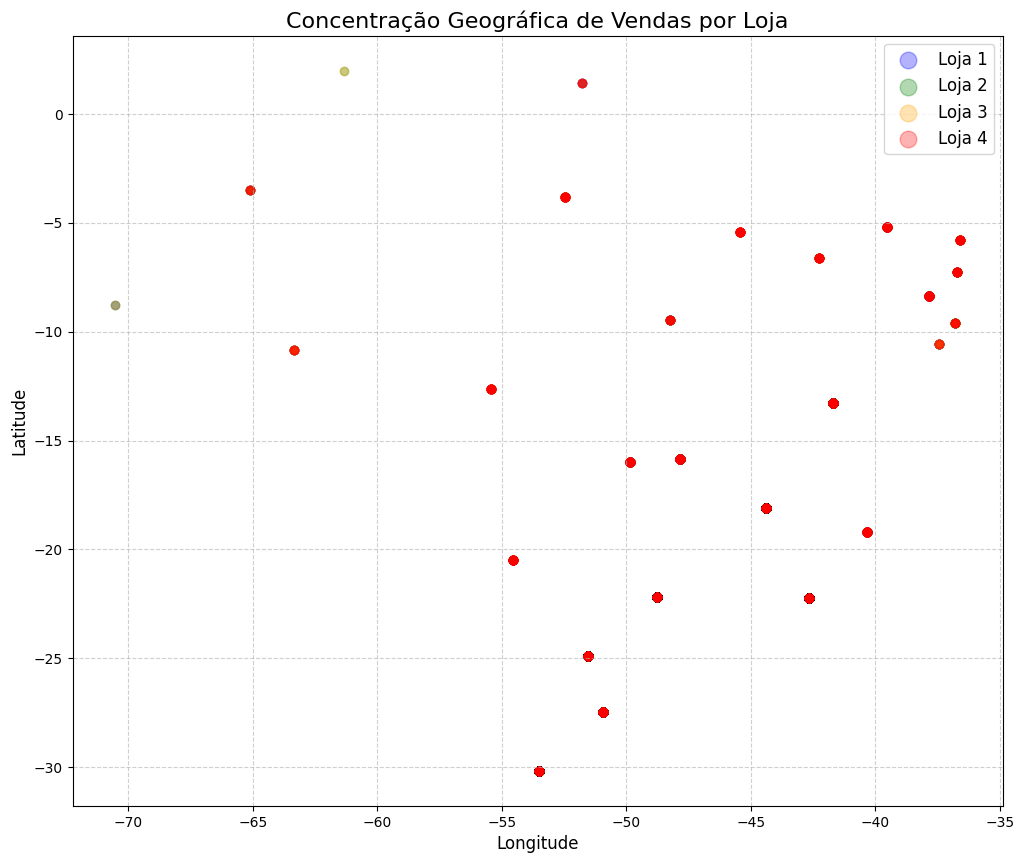

In [18]:
import matplotlib.pyplot as plt

# 1. Criar uma função "raiz" para extrair as coordenadas
def extrair_coordenadas(lista_da_loja):
    lista_lats = []
    lista_lons = []

    # Usando o loop FOR para percorrer a LISTA
    for venda in lista_da_loja:
        lista_lats.append(venda['lat'])
        lista_lons.append(venda['lon'])

    return lista_lats, lista_lons

# 2. Extrair as coordenadas de TODAS as lojas
lats1, lons1 = extrair_coordenadas(lista_loja1)
lats2, lons2 = extrair_coordenadas(lista_loja2)
lats3, lons3 = extrair_coordenadas(lista_loja3)
lats4, lons4 = extrair_coordenadas(lista_loja4)

# 3. Criar o Gráfico de Dispersão (que vira Heatmap)
print("--- Análise Geográfica de Vendas por Loja ---")

plt.figure(figsize=(12, 10)) # Um mapa grande!

# Plotar os pontos de CADA loja com sua cor e transparência
# alpha=0.3 é a mágica: onde os pontos se sobrepõem, fica escuro!
plt.scatter(lons1, lats1, color='blue', alpha=0.3, label='Loja 1')
plt.scatter(lons2, lats2, color='green', alpha=0.3, label='Loja 2')
plt.scatter(lons3, lats3, color='orange', alpha=0.3, label='Loja 3')
plt.scatter(lons4, lats4, color='red', alpha=0.3, label='Loja 4')

# 4. Adicionar títulos e rótulos
plt.title('Concentração Geográfica de Vendas por Loja', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(markerscale=2, fontsize=12) # Legenda para saber quem é quem
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Mostrar o gráfico
plt.show()


# Relatório Final de Análise: Lojas Alura Store

**Para:** Sr. João
**De:** [Seu Nome/Eu, como Analista de Dados]
**Data:** [Data de Hoje]

---

## 1. Objetivo da Análise

O objetivo deste relatório é analisar o desempenho das quatro lojas da rede Alura Store para identificar a unidade com o **menor potencial estratégico**, auxiliando na decisão de qual loja vender para investir em um novo negócio.

## 2. Métricas Analisadas

Para esta decisão, foram analisadas 5 métricas principais, além de um estudo geográfico opcional que se provou decisivo:
1.  Faturamento Total (Gráfico de Barras)
2.  Média de Avaliação dos Clientes (Gráfico de Dispersão)
3.  Vendas por Categoria (Gráfico de Pizza)
4.  Frete Médio por Venda
5.  **Análise de Distribuição Geográfica (Gráfico de Dispersão)**

## 3. Análise dos Resultados

### O Dilema: Faturamento vs. Potencial

Inicialmente, a **Loja 4** parecia a candidata óbvia para a venda por ter o **menor faturamento total** (R$ 1.38M). No entanto, uma análise mais profunda das outras métricas revelou que o faturamento não conta a história toda.

### O Caso da Loja 1: Faturamento Alto, Risco Alto
* **Faturamento:** É a loja que mais fatura (R$ 1.53M).

* **Avaliação:** Possui a **PIOR avaliação média** da rede (3.98 estrelas).

* **Frete:** Possui o **frete médio mais CARO** (R$ 34.69).

* **Geografia:** A análise geográfica mostra que suas vendas são *extremamente* concentradas em pouquíssimos locais (poucos pontos azuis).

**Conclusão (Loja 1):** É uma loja "local" que fatura muito, mas à custa da satisfação do cliente (risco de churn/reputação) e com logística cara.

### O Caso da Loja 4: O "Ativo Oculto"
* **Faturamento:** É a loja com menor faturamento (R$ 1.38M).

* **Avaliação:** Possui uma **boa avaliação** (4.00 estrelas), superando a Loja 1.

* **Frete:** Possui o **frete médio mais BARATO** da rede (R$ 31.28).

* **Geografia:** A análise geográfica foi a descoberta crucial. O mapa é **dominado pelos pontos vermelhos da Loja 4**. Isso significa que ela é a **única loja com distribuição e logística de alcance NACIONAL**.

**Conclusão (Loja 4):** O faturamento dela é "baixo" porque está *pulverizado* pelo Brasil inteiro. Ela possui a melhor logística (frete barato) e uma infraestrutura de alcance nacional, que é um ativo estratégico valiosíssimo.

## 4. Recomendação Final

Com base na análise completa, a loja recomendada para a venda é a **Loja 1**.

**Justificativa:**

Embora a Loja 1 tenha o maior faturamento, ela representa o maior risco e o menor potencial de escala para o Sr. João. Seus principais problemas são:

1.  **A Pior Satisfação do Cliente (3.98):** Vender uma loja com clientes insatisfeitos é uma decisão de saneamento de portfólio.
2.  **Logística Cara (Frete de R$ 34.69):** É a operação mais custosa por venda.
3.  **Alcance Geográfico Limitado:** É um negócio "local", sem a infraestrutura de escala que a Loja 4 demonstrou.

A **Loja 4**, apesar do faturamento total menor, é o ativo mais estratégico da rede: possui alcance nacional, logística barata e clientes satisfeitos. **Vender a Loja 4 seria vender o ativo com maior potencial de crescimento futuro.**